<a href="https://colab.research.google.com/github/Abishethvarman/CrossDomain-Interpretable-Regression/blob/Sujair/10-Energy/Nb_10_Energy_data_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#csv upload
from google.colab import files
uploaded = files.upload()

Saving Renewable_Energy_Production_and_Consumption.xlsx to Renewable_Energy_Production_and_Consumption.xlsx


In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn  # Import sklearn after installing the specific version
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf

In [ ]:
import pandas as pd

# Read Excel file
df = pd.read_excel("Renewable_Energy_Production_and_Consumption.xlsx")

# Save as CSV
df.to_csv("Renewable_Energy_Production_and_Consumption.csv", index=False)

print("Conversion completed!")


Conversion completed!


In [ ]:
df = pd.read_csv('Renewable_Energy_Production_and_Consumption.csv')

In [ ]:
df.head(10)

,Country,Year,Total_Energy_Consumed_GWh,Solar_Energy_Produced_GWh,Wind_Energy_Produced_GWh,Hydro_Energy_Produced_GWh,Other_Renewable_Energy_GWh,Non_Renewable_Energy_GWh,CO2_Emissions_Metric_Tons
0,Country_1,2015,285762.2,10402.0,47563.9,39218.1,629.8,18276.5,762386.0
1,Country_1,2016,94908.5,29474.2,49938.8,24416.0,1237.7,51278.9,107060.4
2,Country_1,2017,215680.6,25793.2,19221.1,22064.3,4221.1,194503.8,585307.5
3,Country_1,2018,218026.3,20533.4,15641.4,1540.4,1962.8,196055.3,814390.1
4,Country_1,2019,113048.8,6861.9,43059.4,46401.3,4079.8,134436.3,339605.5
5,Country_2,2015,131187.7,21418.7,49932.0,30562.1,6467.7,177220.3,642962.4
6,Country_2,2016,258699.6,4565.4,31852.4,10954.5,5698.8,50652.7,702010.1
7,Country_2,2017,240451.3,5839.7,39961.9,46060.6,2696.2,194688.0,689522.2
8,Country_2,2018,132274.0,21379.9,39305.5,45831.7,3766.3,37129.1,501264.7
9,Country_2,2019,183489.1,15963.7,18411.6,49470.0,6333.3,29213.8,411920.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     250 non-null    object 
 1   Year                        250 non-null    int64  
 2   Total_Energy_Consumed_GWh   250 non-null    float64
 3   Solar_Energy_Produced_GWh   250 non-null    float64
 4   Wind_Energy_Produced_GWh    250 non-null    float64
 5   Hydro_Energy_Produced_GWh   250 non-null    float64
 6   Other_Renewable_Energy_GWh  250 non-null    float64
 7   Non_Renewable_Energy_GWh    250 non-null    float64
 8   CO2_Emissions_Metric_Tons   250 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 17.7+ KB


In [ ]:
df.describe()

,Year,Total_Energy_Consumed_GWh,Solar_Energy_Produced_GWh,Wind_Energy_Produced_GWh,Hydro_Energy_Produced_GWh,Other_Renewable_Energy_GWh,Non_Renewable_Energy_GWh,CO2_Emissions_Metric_Tons
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,2017.000000,176274.529200,25690.261600,24997.231200,26051.252000,5227.685600,102906.343200,541909.587600
std,1.417051,72464.074088,14117.501535,14828.215517,14717.285994,2734.519402,55836.281851,251071.704262
min,2015.000000,51093.500000,1192.500000,1007.700000,1183.500000,578.900000,10228.700000,102274.800000
25%,2016.000000,113154.350000,14306.675000,11844.450000,13406.025000,2996.675000,52062.250000,321853.900000
50%,2017.000000,169476.000000,25035.100000,24701.450000,25251.050000,5157.950000,99237.300000,539561.000000
75%,2018.000000,240156.525000,39043.350000,38112.525000,39847.250000,7650.075000,150347.025000,767639.450000
max,2019.000000,297547.900000,49967.400000,49938.800000,49891.400000,9987.600000,199678.300000,985616.300000


In [ ]:
target = "CO2_Emissions_Metric_Tons"
X = df.drop(columns=["Country", target])
y = df[target]

# MI - Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_regression


mi = mutual_info_regression(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI': mi}).sort_values(by='MI', ascending=False)
print(mi_df)

                      Feature        MI
5  Other_Renewable_Energy_GWh  0.021404
6    Non_Renewable_Energy_GWh  0.006331
3    Wind_Energy_Produced_GWh  0.005155
2   Solar_Energy_Produced_GWh  0.000000
1   Total_Energy_Consumed_GWh  0.000000
0                        Year  0.000000
4   Hydro_Energy_Produced_GWh  0.000000


# Corr

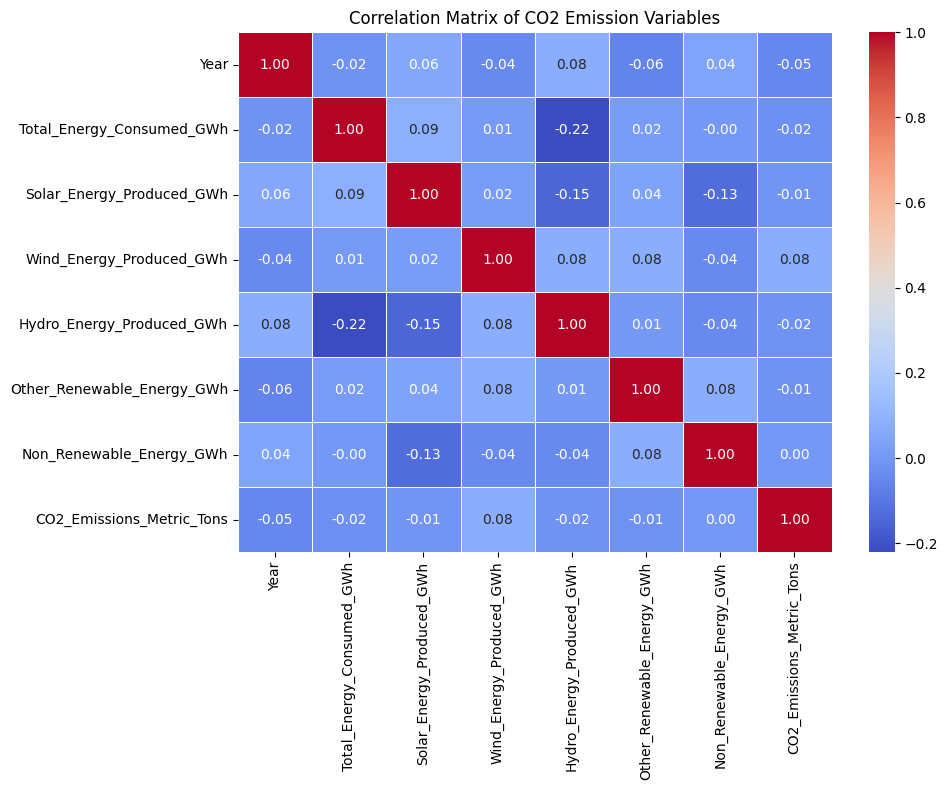

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Title = "CO2 Emission"
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title(f"Correlation Matrix of {Title} Variables")
plt.tight_layout()
plt.show()

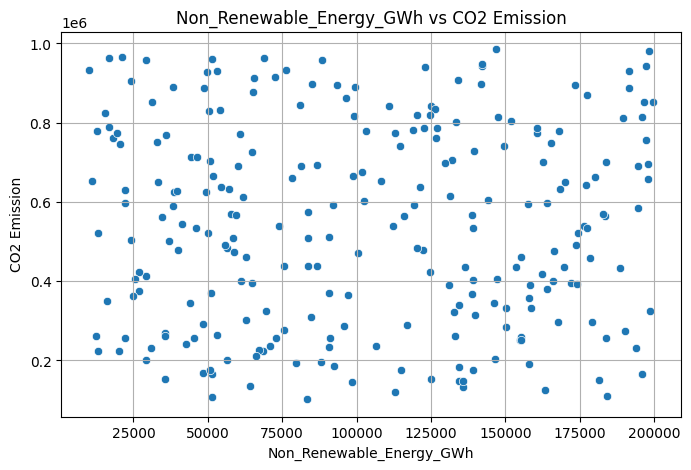

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=numeric_df,
    x='Non_Renewable_Energy_GWh',
    y=target
)

plt.xlabel("Non_Renewable_Energy_GWh")
plt.ylabel("CO2 Emission")
plt.title("Non_Renewable_Energy_GWh vs CO2 Emission")
plt.grid(True)
plt.show()

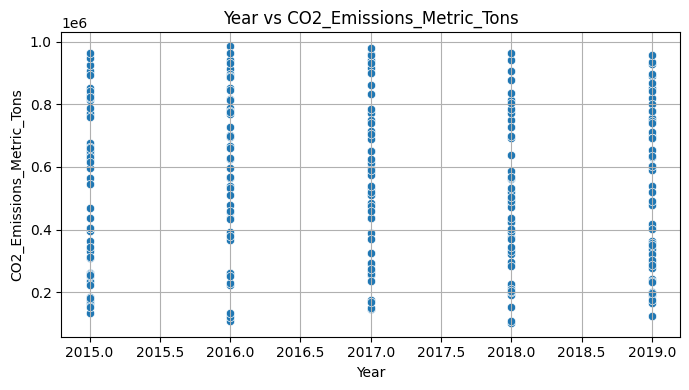

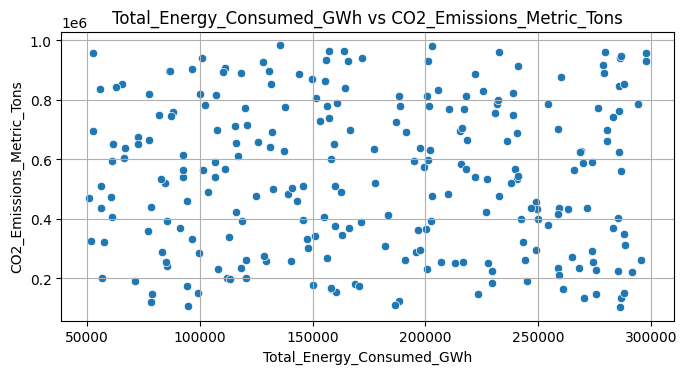

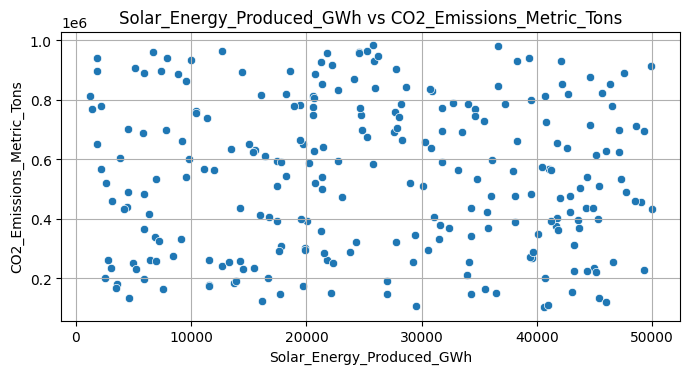

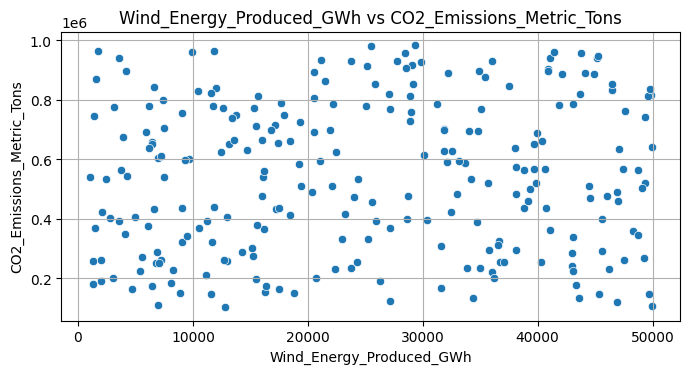

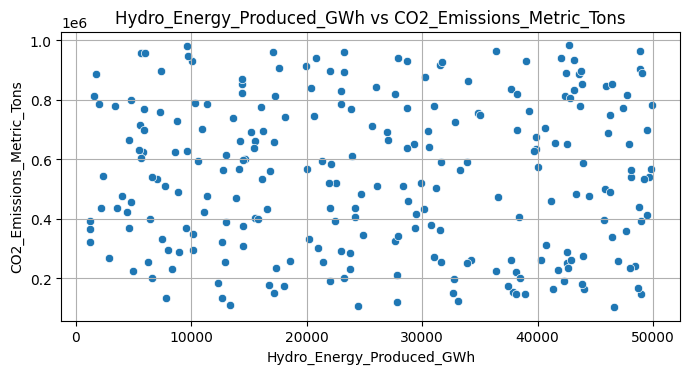

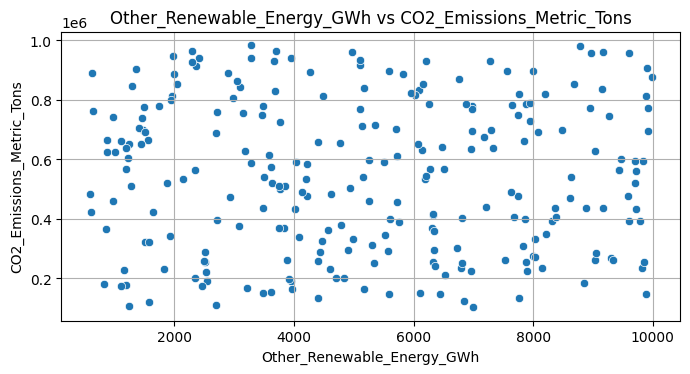

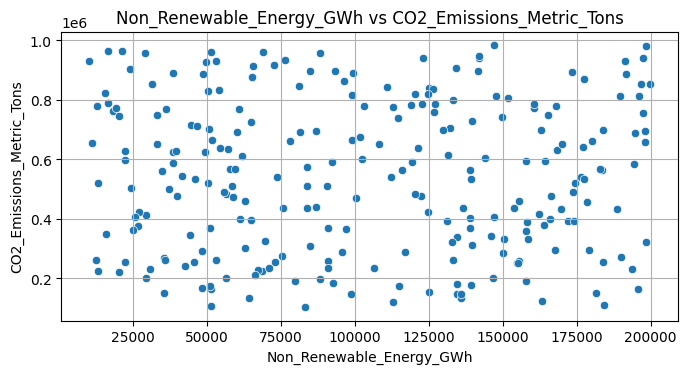

In [ ]:
features = X
numeric = df.drop(columns=["Country"])
for feature in features:
    plt.figure(figsize=(7, 4))
    sns.scatterplot(data=numeric, x=feature, y=target)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"{feature} vs {target}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

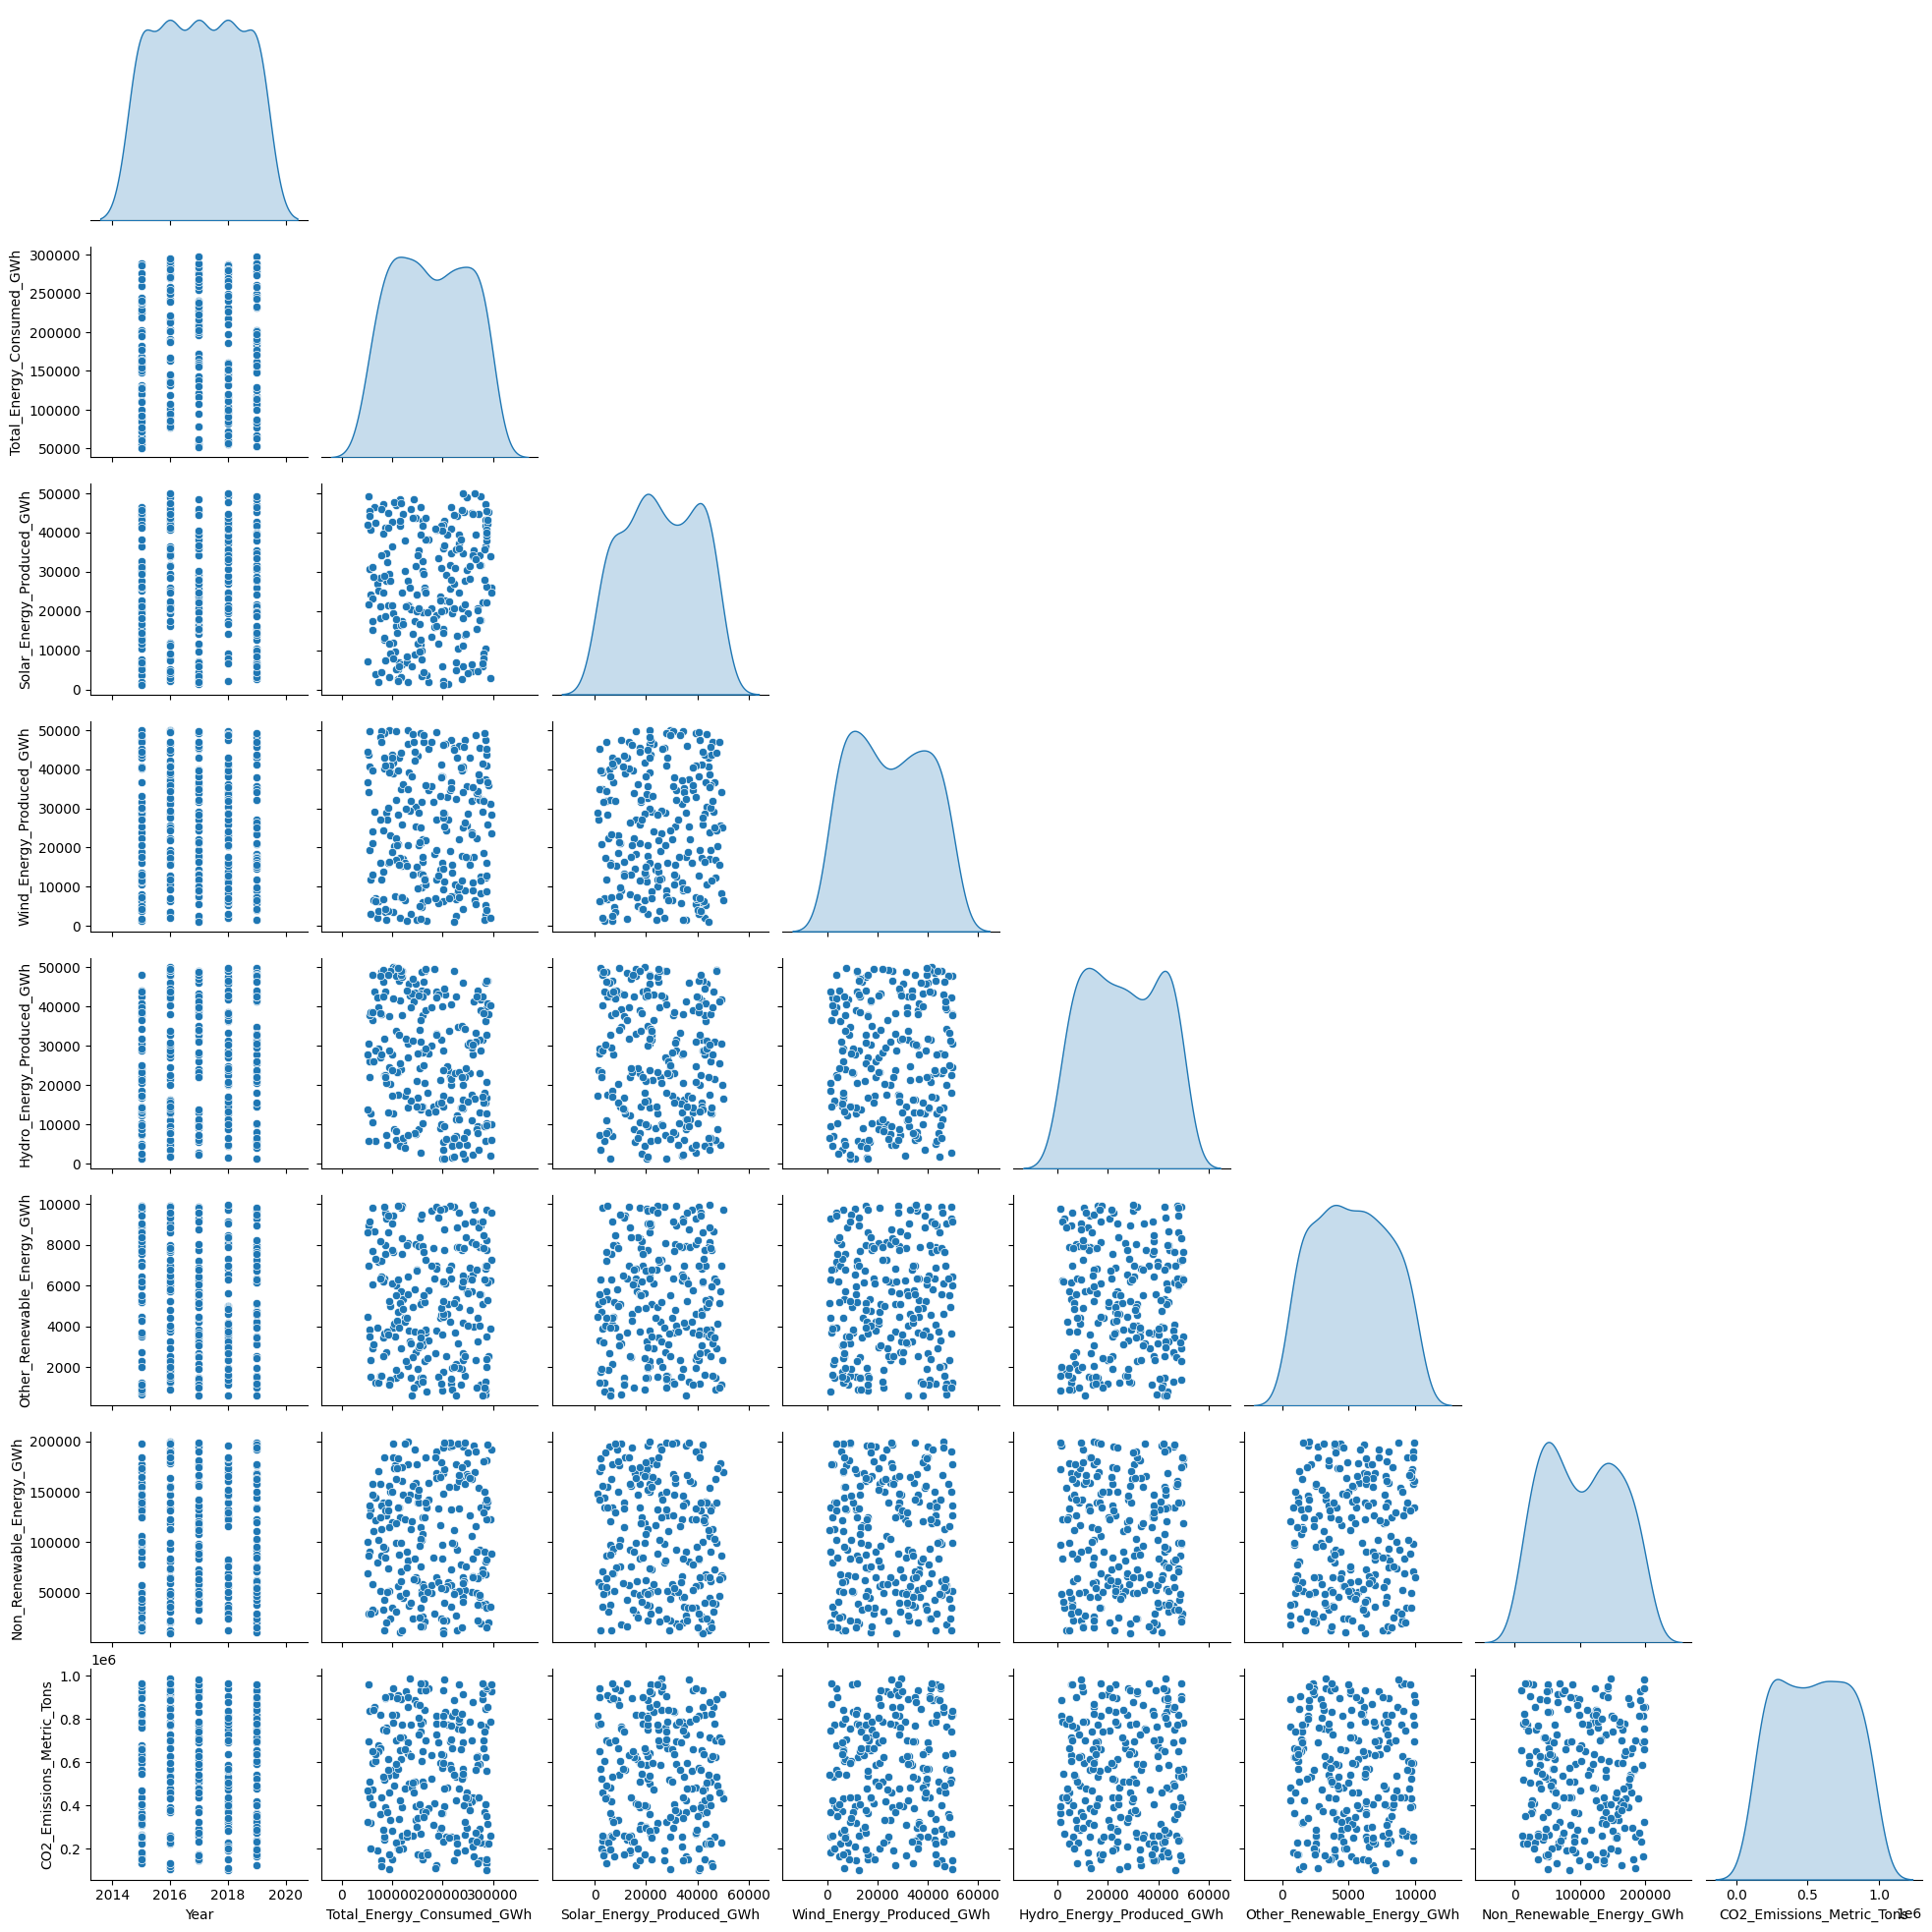

In [ ]:
sns.pairplot(
    numeric,
    diag_kind="kde",
    corner=True
)
plt.show()

# Partial Dependence

/tmp/ipython-input-3661485987.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


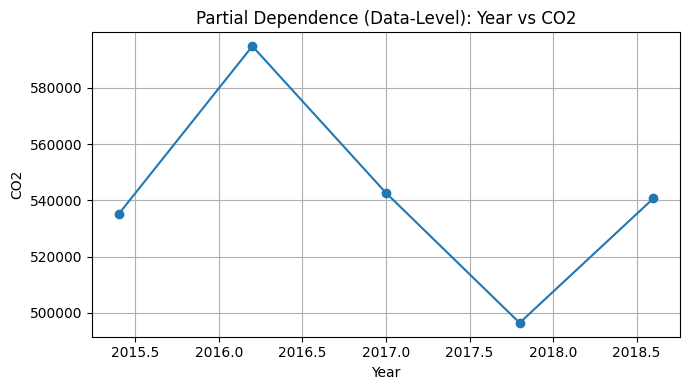

/tmp/ipython-input-3661485987.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


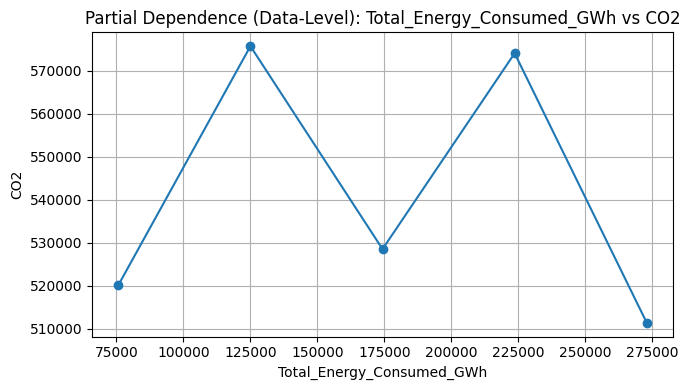

/tmp/ipython-input-3661485987.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


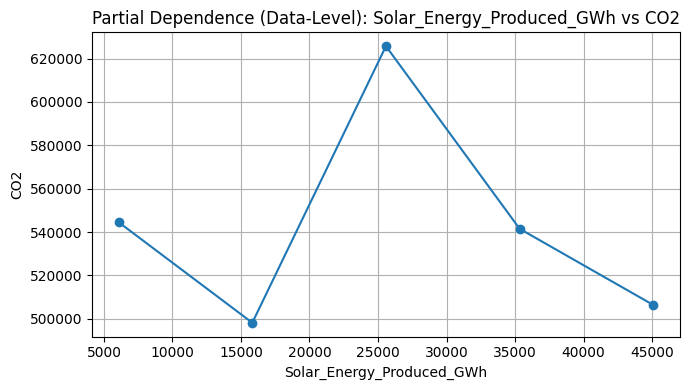

/tmp/ipython-input-3661485987.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


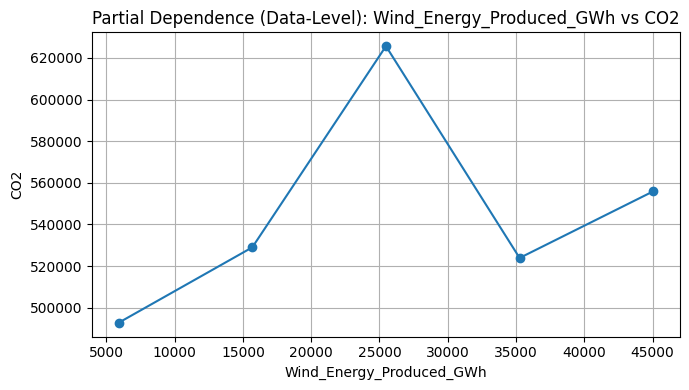

/tmp/ipython-input-3661485987.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


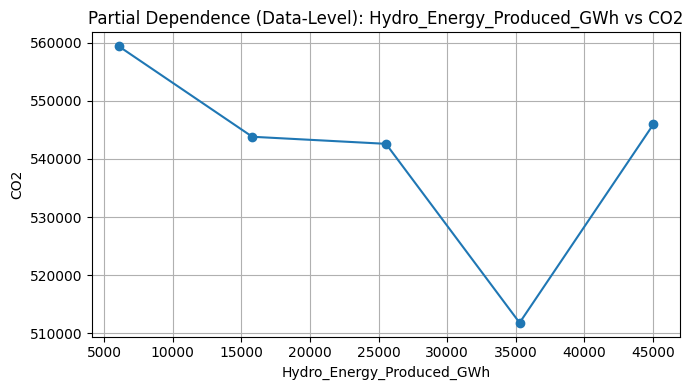

/tmp/ipython-input-3661485987.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


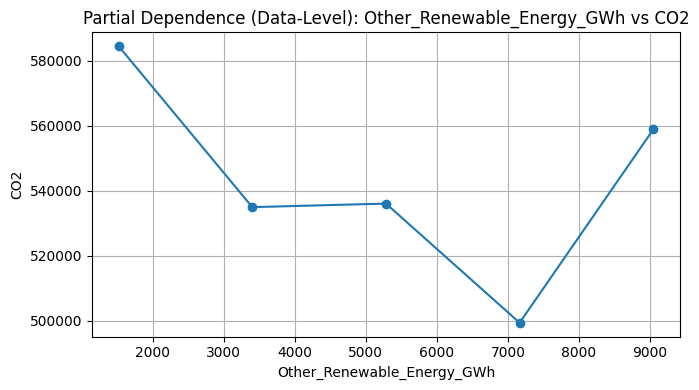

/tmp/ipython-input-3661485987.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_production = temp_df.groupby('bin')[target].mean()


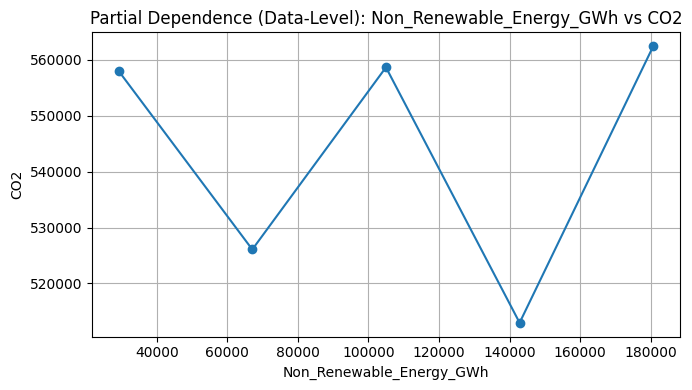

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


numeric_features = numeric.select_dtypes(include=['int64', 'float64']).columns.drop(target)

num_bins = 6

for feature in numeric_features:
    temp_df = numeric_df[[feature, target]].dropna().copy()

    # Create bin edges (must be monotonically increasing)
    bin_edges = np.linspace(
        temp_df[feature].min(),
        temp_df[feature].max(),
        num_bins
    )

    # Assign bins correctly
    temp_df['bin'] = pd.cut(
        temp_df[feature],
        bins=bin_edges,
        include_lowest=True
    )

    # Mean target per bin
    mean_production = temp_df.groupby('bin')[target].mean()
    bin_centers = [interval.mid for interval in mean_production.index]

    # Plot
    plt.figure(figsize=(7, 4))
    plt.plot(bin_centers, mean_production.values, marker='o')
    plt.xlabel(feature)
    plt.ylabel("CO2")
    plt.title(f"Partial Dependence (Data-Level): {feature} vs CO2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()